# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
#Import
import pickle
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import glob
import matplotlib.image as mpimg
from numpy import newaxis
%matplotlib inline
from sklearn.utils import shuffle

---
## Step 0: Load The Data

In [24]:
# Load pickled data
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file='traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(list(set(y_train)))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.

X_train, y_train = shuffle(X_train, y_train)
def normalize(data):
    return ((data / 128) -1)

def normalizestd(data):
    return (data - np.mean(data)) / np.std(data)

def normalize(img):
    image=img.copy()
    return (image - np.mean(image)) / np.std(image)
def grayscale(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return gray
def getHistogram(y):
    return np.histogram(y, bins=np.arange(0,n_classes+1))
def transformPipeLine(images):
        return_imgs=[]
        for img in images:
            return_imgs.append(grayscale(img))
        return normalize(np.array(return_imgs))

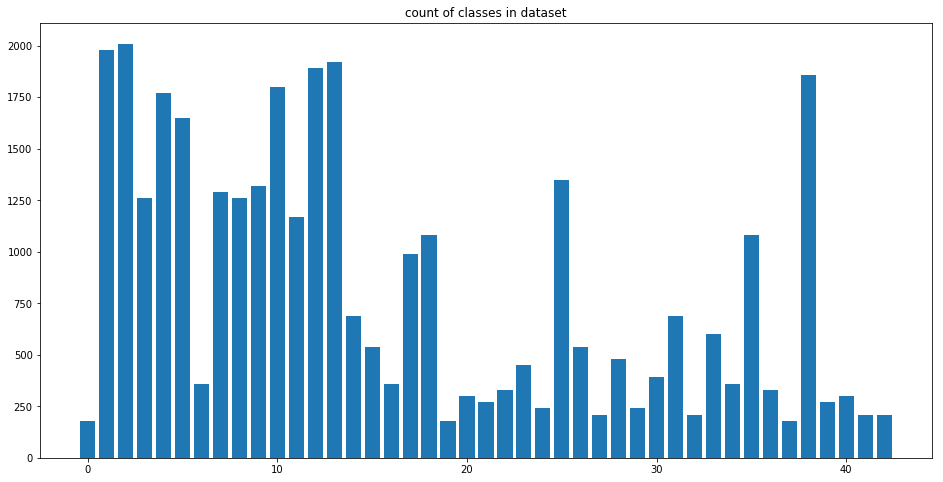

In [6]:
#This chart shows distribution of the input
fig = plt.figure(figsize=(16, 8))
plt.bar(left=np.arange(0,n_classes), height=getHistogram(y_train)[0], width=0.8, align='center')
plt.title('count of classes in dataset')
plt.show()

### Question 1
Describe how you preprocessed the data. Why did you choose that technique?

**Answer:**
During the testing it was observed that normalization of data produced best accuracy so for preprocessing only normalization was performed using the following formula ($X_\text{norm} = \frac{X}{128}$ -1 ).

### Preprocessing Step on sample image

3


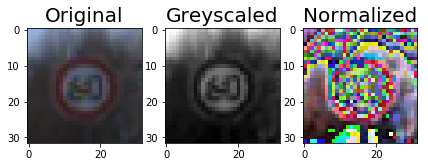

In [74]:
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
image_class=y_train[index]
image_g=grayscale(image)
image_normalized=normalizestd(image)
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(7,7))
ax1.imshow(image)
ax1.set_title('Original', fontsize=20)
ax2.imshow(image_g, cmap='gray')
ax2.set_title('Greyscaled', fontsize=20)
ax3.set_title('Normalized', fontsize=20)
ax3.imshow(image_normalized, cmap='gray')
print(image_class)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### Question 2
Describe how you set up the training, validation and testing data for your model. 

**Answer**

I used the training and validation set as provided. I normalized traning,validation and test set before using.

In [ ]:
#Transformed Input
X_train=normalize(X_train)
X_valid=normalize(X_valid)
X_test=normalize(X_test)

(32, 32, 3)


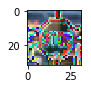

In [11]:
#Plot transformed data
index = random.randint(0, len(X_train))
image_t = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image_t, cmap="gray")
print(image_t.shape)

### Model Architecture

### Question 3
Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

My final model consisted of the following layers:

### Input
The architecture accepts a 32x32x3 image as input.
### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** RELU.

**Layer 2: Convolutional.** The output shape should be 24x24x16.

**Activation.** RELU.

**Pooling.** The output shape should be 12x12x16.

**Layer 3: Convolutional.** The output shape should be 8x8x64.

**Activation.** RELU.

**Layer 4: Convolutional.** The output shape should be 4x4x128.

**Activation.** RELU.

**Pooling.** The output shape should be 2x2x128.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 256 outputs.

**Activation.** RELU.

**Layer 4: Fully Connected.** This should have 128 outputs.

**Activation.** RELU.

**Layer 5: Fully Connected (Logits).** This should have 43 outputs.

### Output
Return the result of the 2nd fully connected layer.							|

In [8]:
### Define your architecture here.
from tensorflow.contrib.layers import flatten

def model(x,channel=3):    
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, channel, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    # Dropout
    conv1 = tf.nn.dropout(conv1, pkeep_conv)
    
    # Layer 2: Convolutional. Output = 24x24x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)
    # Pooling. Input = 24x24x16. Output = 12x12x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # Dropout
    conv2 = tf.nn.dropout(conv2, pkeep_conv)

    
    # Layer 3: Convolutional. Input = 12x12x16. Output = 8x8x64.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 64), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(64))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    conv3 = tf.nn.relu(conv3)
    # Dropout
    conv3 = tf.nn.dropout(conv3, pkeep_conv)
    
    # Layer 4: Convolutional. Output = 4x4x128.
    conv4_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 64, 128), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(128))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='VALID') + conv4_b
    conv4 = tf.nn.relu(conv4)
    # Pooling. Input = 4x4x128. Output = 2x2x128.
    conv4 = tf.nn.max_pool(conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # Dropout
    conv4 = tf.nn.dropout(conv4, pkeep_conv)

    
    # Flatten. Input = 2x2x128. Output = 512.
    fc0   = flatten(conv4)

    # Layer 3: Fully Connected. Input = 512. Output = 256.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(512, 256), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(256))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    fc1    = tf.nn.relu(fc1)
     # Dropout
    fc1 = tf.nn.dropout(fc1, pkeep)
    # Layer 4: Fully Connected. Input = 256. Output = 128.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(256, 128), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(128))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    fc2    = tf.nn.relu(fc2)
     # Dropout
    fc2 = tf.nn.dropout(fc2, pkeep)
    
    # Layer 5: Fully Connected. Input = 128. Output = number of classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(128, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### EPOCH and BATCH SIZE

In [22]:
EPOCHS = 20 #Number of epochs for training
BATCH_SIZE = 128 #Batchsize for training
channel=3 #Channels in image

### Features and Labels

In [12]:
#Placeholders for reading input
x = tf.placeholder(tf.float32, (None, 32, 32, channel))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

#iteration count
iteration = tf.placeholder(tf.int32)
# dropout probability
pkeep = tf.placeholder(tf.float32)
pkeep_conv = tf.placeholder(tf.float32)
# variable learning rate
lr = tf.placeholder(tf.float32)

### Training Pipeline

In [13]:
logits = model(x,channel)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(lr)
training_operation = optimizer.minimize(loss_operation)

### Evaluation

In [14]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
prediction=tf.argmax(one_hot_y, 1)
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, pkeep: 1, pkeep_conv: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Training

In [15]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        max_learning_rate = 0.002
        min_learning_rate = 0.0001
        decay_speed = EPOCHS
        learning_rate = round(min_learning_rate + (max_learning_rate - min_learning_rate) * math.exp(-i/decay_speed),4)
        print(learning_rate)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y ,lr: learning_rate, pkeep: 1, pkeep_conv:0.75,iteration:i})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './model')
    print("Model saved")

Training...

0.002
EPOCH 1 ...
Validation Accuracy = 0.900

0.0019
EPOCH 2 ...
Validation Accuracy = 0.954

0.0018
EPOCH 3 ...
Validation Accuracy = 0.970

0.0017
EPOCH 4 ...
Validation Accuracy = 0.971

0.0017
EPOCH 5 ...
Validation Accuracy = 0.973

0.0016
EPOCH 6 ...
Validation Accuracy = 0.976

0.0015
EPOCH 7 ...
Validation Accuracy = 0.968

0.0014
EPOCH 8 ...
Validation Accuracy = 0.977

0.0014
EPOCH 9 ...
Validation Accuracy = 0.983

0.0013
EPOCH 10 ...
Validation Accuracy = 0.983

0.0013
EPOCH 11 ...
Validation Accuracy = 0.983

0.0012
EPOCH 12 ...
Validation Accuracy = 0.969

0.0011
EPOCH 13 ...
Validation Accuracy = 0.985

0.0011
EPOCH 14 ...
Validation Accuracy = 0.980

0.001
EPOCH 15 ...
Validation Accuracy = 0.979

0.001
EPOCH 16 ...
Validation Accuracy = 0.986

0.001
EPOCH 17 ...
Validation Accuracy = 0.986

0.0009
EPOCH 18 ...
Validation Accuracy = 0.988

0.0009
EPOCH 19 ...
Validation Accuracy = 0.980

0.0008
EPOCH 20 ...
Validation Accuracy = 0.980

Model saved


### Model Evaluation

In [16]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.966


### Question 4 

Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

**Answer**

Model was trained using Adam optimizer. I used learning rate decay starting with higher learning rate and then slowly decreasing the learning. Max learning rate was set as .002 and min learning rate as .0001.Decay speed was kept equal to number of EPOCHS.

I used batch size of 128 and ran for 20 epochs as validation accuracy didn't improve after that.

For the model hyper-parameters, I stuck with a mean of 0 and standard deviation/sigma of 0.1.

### Question 5
What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem.

**Answer**

Validation accuracy for my approach is 0.98.

Using just the LeNet architecture I was able to reach validation accuracy of only .90. So I added additional 2 more comvolutional layers and also increased the sizes of my fully connected layer.

I also added dropout of .25 after every layer to prevent overfitting.

This helped in improving validation accuracy to 0.95.

To further improve accuracy I used batch size of 128 and also used learning rate decay, varying learning rate from .002 to .0001 . 

Also I increased number of EPOCS from earlier value of 10 to 20.

With all these changes I was able to consistently hit validation accuracy of at-least 0.98.


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Question 6
Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook.

**Answer**: The five images chosen are:
* Road Work.
* Left Turn.
* Stop Sign.
* Yeild Sign.
* 60km Speed limit sign.

### Load and Output the Images

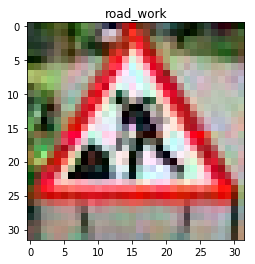

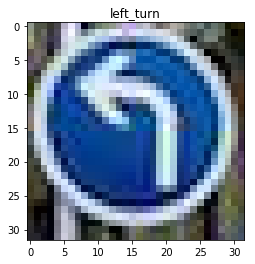

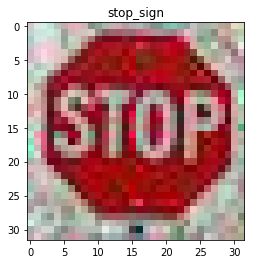

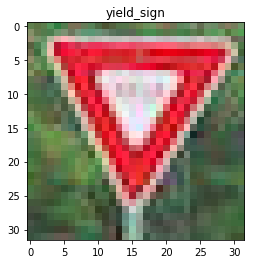

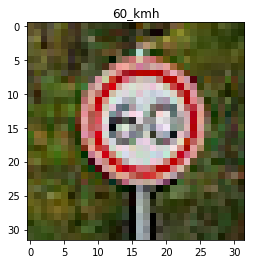

In [55]:
#Load german traffic images
german_traffic_data=[]
traffic_signs = glob.glob('german_traffic_sign/*',recursive=True)
for image in traffic_signs:
        img=mpimg.imread(image)
        fileName=image.split("/")[1].split(".")[0]
        german_traffic_data.append(img)
        plt.imshow(img)
        plt.title(fileName)
        plt.show()
#Normalize input
german_traffic_data=normalize(german_traffic_data)

#### Potential difficulties with german traffic images dataset

* Difference in image histogram
* Difference in contrast

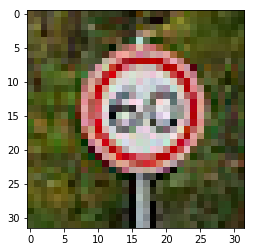

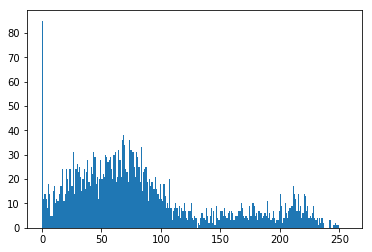

3072

In [88]:
#Image histogram german traffic images dataset
img=cv2.cvtColor(cv2.imread('german_traffic_sign/60_kmh.jpg', cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
plt.hist(img.ravel(),256,[0,256]); plt.show()
img.size

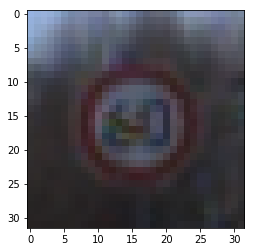

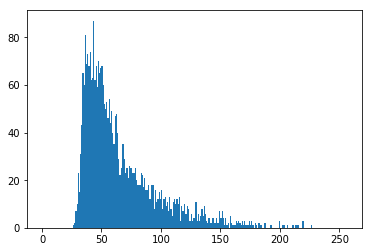

3072

In [80]:
#Image histogram Traffic signs data set
img=X_train[5705]
plt.imshow(img)
plt.show()
plt.hist((img).ravel(),256,[0,256]); plt.show()
X_train[0].size

We can clearly see for 60 km/h speed limit sign in the German traffic images data set has very different histogram.It also seems that the image has lower contrast. This will surely make traffic signs with more complex shape very difficult to classify. 

### Predict the Sign Type for Each Image

In [19]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions = sess.run(logits, feed_dict={x: german_traffic_data,pkeep: 1, pkeep_conv:1})

### Analyze Performance

### Question 7
Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate.

In [20]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    prediction = sess.run(tf.nn.top_k((predictions), k=5, sorted=True))
    
for i in range(len(prediction[0])):
    print('Image', i, 'probabilities:', prediction[0][i], '\n and predicted classes:', prediction[1][i])

Image 0 probabilities: [ 23.34737968  19.92960358  11.30270672  10.90556049   9.33794689] 
 and predicted classes: [18  1  5  4  0]
Image 1 probabilities: [ 34.27561951  29.32116508  18.35739326  12.65977478   8.24320412] 
 and predicted classes: [34 35 38 37 10]
Image 2 probabilities: [ 21.33496094   4.28812456   4.17121553   4.11383581   3.57753301] 
 and predicted classes: [14 26 17 15  1]
Image 3 probabilities: [ 40.03987122   8.56211185   6.01118422   4.66693306   3.44292307] 
 and predicted classes: [13 35 41 12 34]
Image 4 probabilities: [ 12.36163616  10.91278267  10.09543991   8.64745331   8.1240387 ] 
 and predicted classes: [ 3 23  2  9 19]


**Answer**

Model was able to predict 4 out of 5 images correctly hence the accuracy of **80%**.
* Image 1 of read work was wrongly predicted as class 18 (General caution)
* Image 2 of left turn was correctly predicted as class 34 (Turn left ahead)
* Image 3 of stop sigh was correctly predicted as class 14 (Stop)
* Image 4 of yield sign was correctly predicted as class 13 (Yield)
* Image 5 of 60 km speed limit was correctly predicted as class 3 (Speed limit (60km/h))

This is much less than accuracy of **96.6%** in the test set.The following could be the reasons 
* 34799 samples of Traffic signs training data set is not sufficient. Augmenting this data set with lower resolution ,transformed and stretched images may help in better generalization.
* More pre-processing steps  required while learning to remove any data set specific features which may help in better generalization. 
* Convolutional layers  not deep enough to capture all shape information.Which is evident from the fact that image with class 18 has similar outer triangular shape when compared to road work in the German traffic sign data set.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [21]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
for i in range(len(prediction[0])):
    print('Image', i, 'probabilities:', prediction[0][i], '\n and predicted classes:', prediction[1][i])

Image 0 probabilities: [ 23.34737968  19.92960358  11.30270672  10.90556049   9.33794689] 
 and predicted classes: [18  1  5  4  0]
Image 1 probabilities: [ 34.27561951  29.32116508  18.35739326  12.65977478   8.24320412] 
 and predicted classes: [34 35 38 37 10]
Image 2 probabilities: [ 21.33496094   4.28812456   4.17121553   4.11383581   3.57753301] 
 and predicted classes: [14 26 17 15  1]
Image 3 probabilities: [ 40.03987122   8.56211185   6.01118422   4.66693306   3.44292307] 
 and predicted classes: [13 35 41 12 34]
Image 4 probabilities: [ 12.36163616  10.91278267  10.09543991   8.64745331   8.1240387 ] 
 and predicted classes: [ 3 23  2  9 19]


### Question 8
Use the model's softmax probabilities to visualize the certainty of its predictions, tf.nn.top_k could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)

**Answer**

Prediction for Image 1 is completely wrong, the correct class 25(Road work) is not even in top 5. 

In case of Image2, class 34 and 25 are very close but class 34 has a slightly higher value which is sufficient for correct prediction in this case.

For Image3 & Image4 there is no confusion .The correct class has much higher value than the rest.

In case of Image5 again class 3 and class 23 have close values.But class 3 has slightly higher value for a correct prediction in this case.

Overall model performs well in the chosen 5 image files. But to be certain tests must be done on large number of  images.

Also,augmenting the data-set with transformed and stretched images can help in producing more robust model.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.